In [1]:
# Import libraries for financial visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
%config InlineBackend.figure_format = 'retina'
from qbstyles import mpl_style
mpl_style(dark=True)

In [3]:
import bt
import yfinance as yf

In [4]:
import sys
sys.path.append("..")

from utils.tickers import get_symbols
from utils.multiples import get_valuation_multiples_for_symbols, get_financial_data

## 1. Prepare Dataset

### 1-1. Get Tickers (Tech - Software only)

In [5]:
region = 'us'
sector = 'Technology'
peer_group = 'Software & Services'

df_symbols = get_symbols(region, sector, peer_group)
df_symbols

,symbol,shortName
0,ABLGF,ALTEN SA
1,ACIW,"ACI Worldwide, Inc."
2,ACN,Accenture plc
3,ADBE,Adobe Inc.
4,ADP,"Automatic Data Processing, Inc."
...,...,...
335,YOU,"Clear Secure, Inc."
336,ZETA,Zeta Global Holdings Corp.
337,ZI,ZoomInfo Technologies Inc.
338,ZM,"Zoom Communications, Inc."


### 1-2. Get Financial Statements

In [6]:
from mysql.connector import connect as conn

In [8]:
config = {
    'user': 'root',
    'password': '',
    'host':'127.0.0.1',
    'database':'earnings/main'
}

cnx = conn(**config)


In [9]:
query = "show tables"
pd.read_sql(query, cnx)

,Tables_in_earnings/main
0,balance_sheet_assets
1,balance_sheet_equity
2,balance_sheet_liabilities
3,cash_flow_statement
4,earnings_calendar
5,eps_estimate
6,eps_history
7,income_statement
8,rank_score
9,sales_estimate


In [10]:
# Assets
query = "select * from balance_sheet_assets"
df_assets = pd.read_sql(query, cnx)

# Equity
query = "select * from balance_sheet_equity"
df_equity = pd.read_sql(query, cnx)

# Liabilities
query = "select * from balance_sheet_liabilities"
df_liabilities = pd.read_sql(query, cnx)

# Cashflow
query = "select * from cash_flow_statement"
df_cashflows = pd.read_sql(query, cnx)

# Income
query = "select * from income_statement"
df_incomes = pd.read_sql(query, cnx)


In [11]:
ticker = yf.Ticker('AAPL')
ticker.income_stmt

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,NaN
Tax Rate For Calcs,0.241,0.147,0.162,0.133,NaN
Normalized EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,93736000000.0,96995000000.0,99803000000.0,94680000000.0,NaN
Reconciled Depreciation,11445000000.0,11519000000.0,11104000000.0,11284000000.0,NaN
Reconciled Cost Of Revenue,210352000000.0,214137000000.0,223546000000.0,212981000000.0,NaN
EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
EBIT,123216000000.0,114301000000.0,119437000000.0,111852000000.0,NaN
Net Interest Income,NaN,-183000000.0,-106000000.0,198000000.0,890000000.0
Interest Expense,NaN,3933000000.0,2931000000.0,2645000000.0,2873000000.0


In [12]:
ticker.balance_sheet

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Treasury Shares Number,NaN,0.0,NaN,NaN,NaN
Ordinary Shares Number,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
Share Issued,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
Net Debt,76686000000.0,81123000000.0,96423000000.0,89779000000.0,NaN
Total Debt,106629000000.0,111088000000.0,132480000000.0,136522000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,65171000000.0,61555000000.0,48304000000.0,62639000000.0,NaN
Other Short Term Investments,35228000000.0,31590000000.0,24658000000.0,27699000000.0,NaN
Cash And Cash Equivalents,29943000000.0,29965000000.0,23646000000.0,34940000000.0,NaN
Cash Equivalents,2744000000.0,1606000000.0,5100000000.0,17635000000.0,NaN


In [13]:
df_assets[df_assets['act_symbol'] == 'AAPL']

,date,act_symbol,period,cash_and_equivalents,receivables,notes_receivable,inventories,other_current_assets,total_current_assets,net_property_and_equipment,investments_and_advances,other_non_current_assets,deferred_charges,intangibles,deposits_and_other_assets,total_assets
579,2013-09-30,AAPL,Year,4.054600e+10,2.064100e+10,0.0,1.764000e+09,1.033500e+10,7.328600e+10,1.659700e+10,1.062150e+11,0.0,0.0,5.756000e+09,5.146000e+09,2.070000e+11
580,2014-09-30,AAPL,Year,2.507700e+10,2.721900e+10,0.0,2.111000e+09,1.412400e+10,6.853100e+10,2.062400e+10,1.301620e+11,0.0,0.0,8.758000e+09,3.764000e+09,2.318390e+11
581,2015-09-30,AAPL,Year,4.160100e+10,3.034300e+10,0.0,2.349000e+09,1.508500e+10,8.937800e+10,2.247100e+10,1.640650e+11,0.0,0.0,9.009000e+09,5.556000e+09,2.904790e+11
582,2016-09-30,AAPL,Quarter,6.715500e+10,2.929900e+10,0.0,2.132000e+09,8.283000e+09,1.068690e+11,2.701000e+10,1.704300e+11,0.0,0.0,8.620000e+09,8.757000e+09,3.216860e+11
583,2016-09-30,AAPL,Year,6.715500e+10,2.929900e+10,0.0,2.132000e+09,8.283000e+09,1.068690e+11,2.701000e+10,1.704300e+11,0.0,0.0,8.620000e+09,8.757000e+09,3.216860e+11
584,2016-12-31,AAPL,Quarter,6.045200e+10,2.797700e+10,0.0,2.712000e+09,1.219100e+10,1.033320e+11,2.651000e+10,1.856380e+11,0.0,0.0,8.271000e+09,7.390000e+09,3.311410e+11
585,2017-03-31,AAPL,Quarter,6.710100e+10,2.061200e+10,0.0,2.910000e+09,1.136700e+10,1.019900e+11,2.716300e+10,1.897400e+11,0.0,0.0,8.090000e+09,7.549000e+09,3.345320e+11
586,2017-06-30,AAPL,Quarter,7.675900e+10,2.263200e+10,0.0,3.146000e+09,1.033800e+10,1.128750e+11,2.928600e+10,1.847570e+11,0.0,0.0,8.105000e+09,1.015000e+10,3.451730e+11
587,2017-09-30,AAPL,Quarter,7.418100e+10,3.567300e+10,0.0,4.855000e+09,1.393600e+10,1.286450e+11,3.378300e+10,1.947140e+11,0.0,0.0,8.015000e+09,1.016200e+10,3.753190e+11
588,2017-09-30,AAPL,Year,7.418100e+10,3.567300e+10,0.0,4.855000e+09,1.393600e+10,1.286450e+11,3.378300e+10,1.947140e+11,0.0,0.0,8.015000e+09,1.016200e+10,3.753190e+11


In [14]:
df_tech_assets = df_assets[df_assets['act_symbol'].apply(lambda x : True if x in df_symbols['symbol'].values else False)].copy()
df_tech_assets = df_tech_assets[df_tech_assets['period'] == 'Year']
df_tech_assets.reset_index(drop=True, inplace=True)
df_tech_assets

,date,act_symbol,period,cash_and_equivalents,receivables,notes_receivable,inventories,other_current_assets,total_current_assets,net_property_and_equipment,investments_and_advances,other_non_current_assets,deferred_charges,intangibles,deposits_and_other_assets,total_assets
0,2012-12-31,ACIW,Year,7.600000e+07,223000000.0,0.0,0.0,57000000.0,3.560000e+08,171000000.0,0.0,0.0,63000000.0,6.290000e+08,32000000.0,1.251000e+09
1,2013-12-31,ACIW,Year,9.500000e+07,206000000.0,0.0,0.0,135000000.0,4.360000e+08,249000000.0,0.0,0.0,49000000.0,9.070000e+08,41000000.0,1.682000e+09
2,2014-12-31,ACIW,Year,7.700000e+07,232000000.0,0.0,0.0,109000000.0,4.180000e+08,270000000.0,0.0,0.0,50000000.0,1.043000e+09,70000000.0,1.851000e+09
3,2015-12-31,ACIW,Year,1.020000e+08,231000000.0,0.0,0.0,55000000.0,3.880000e+08,299000000.0,0.0,0.0,91000000.0,1.170000e+09,43000000.0,1.990000e+09
4,2016-12-31,ACIW,Year,7.600000e+07,273000000.0,0.0,0.0,59000000.0,4.080000e+08,264000000.0,0.0,0.0,77000000.0,1.113000e+09,39000000.0,1.902000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,2020-07-31,ZS,Year,1.371000e+09,148000000.0,0.0,0.0,64000000.0,1.582000e+09,76000000.0,0.0,0.0,78000000.0,5.400000e+07,8000000.0,1.833000e+09
2000,2021-07-31,ZS,Year,1.503000e+09,257000000.0,0.0,0.0,89000000.0,1.848000e+09,109000000.0,0.0,0.0,150000000.0,9.100000e+07,16000000.0,2.258000e+09
2001,2022-07-31,ZS,Year,1.731000e+09,400000000.0,0.0,0.0,126000000.0,2.257000e+09,161000000.0,0.0,0.0,211000000.0,1.100000e+08,22000000.0,2.833000e+09
2002,2023-07-31,ZS,Year,2.100000e+09,583000000.0,0.0,0.0,207000000.0,2.890000e+09,242000000.0,0.0,0.0,259000000.0,1.150000e+08,31000000.0,3.608000e+09


In [15]:
df_tech_equity = df_equity[df_equity['act_symbol'].apply(lambda x : True if x in df_symbols['symbol'].values else False)].copy()
df_tech_equity = df_tech_equity[df_tech_equity['period'] == 'Year']
df_tech_equity.reset_index(drop=True, inplace=True)
df_tech_equity

,act_symbol,date,period,preferred_stock,common_stock,capital_surplus,retained_earnings,other_equity,treasury_stock,total_equity,total_liabilities_and_equity,shares_outstanding,book_value_per_share
0,ACIW,2012-12-31,Year,0.0,0.0,5.350000e+08,2.000000e+08,-14000000.0,187000000.0,5.340000e+08,1.251000e+09,118100000.0,4.52
1,ACIW,2013-12-31,Year,0.0,0.0,5.430000e+08,2.640000e+08,-23000000.0,240000000.0,5.440000e+08,1.682000e+09,115600000.0,4.70
2,ACIW,2014-12-31,Year,0.0,1000000.0,5.520000e+08,3.310000e+08,-20000000.0,283000000.0,5.810000e+08,1.851000e+09,114900000.0,5.06
3,ACIW,2015-12-31,Year,0.0,1000000.0,5.610000e+08,4.170000e+08,-72000000.0,253000000.0,6.540000e+08,1.990000e+09,118200000.0,5.54
4,ACIW,2016-12-31,Year,0.0,1000000.0,6.000000e+08,5.460000e+08,-94000000.0,298000000.0,7.550000e+08,1.902000e+09,117200000.0,6.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,ZS,2020-07-31,Year,0.0,0.0,8.240000e+08,-3.400000e+08,0.0,0.0,4.850000e+08,1.833000e+09,129300000.0,3.75
2000,ZS,2021-07-31,Year,0.0,0.0,1.131000e+09,-6.020000e+08,-1000000.0,0.0,5.290000e+08,2.258000e+09,136900000.0,3.86
2001,ZS,2022-07-31,Year,0.0,0.0,1.591000e+09,-9.920000e+08,-26000000.0,0.0,5.730000e+08,2.833000e+09,141800000.0,4.04
2002,ZS,2023-07-31,Year,0.0,0.0,1.817000e+09,-1.090000e+09,-2000000.0,0.0,7.250000e+08,3.608000e+09,145800000.0,4.97


In [16]:
df_tech_incomes = df_incomes[df_incomes['act_symbol'].apply(lambda x : True if x in df_symbols['symbol'].values else False)].copy()
df_tech_incomes = df_tech_incomes[df_tech_incomes['period'] == 'Year']
df_tech_incomes.reset_index(drop=True, inplace=True)
df_tech_incomes

,act_symbol,date,period,sales,cost_of_goods,gross_profit,selling_administrative_depreciation_amortization_expenses,income_after_depreciation_and_amortization,non_operating_income,interest_expense,...,investment_gains,other_income,income_from_continuing_operations,extras_and_discontinued_operations,net_income,income_before_depreciation_and_amortization,depreciation_and_amortization,average_shares,diluted_eps_before_non_recurring_items,diluted_net_eps
0,ACIW,2012-12-31,Year,6.670000e+08,226000000.0,4.410000e+08,3.670000e+08,74000000.0,1000000.0,10000000.0,...,0.0,0.0,49000000.0,0.0,49000000.0,125000000.0,51000000.0,119720000.0,0.70,0.41
1,ACIW,2013-12-31,Year,8.650000e+08,344000000.0,5.210000e+08,3.980000e+08,123000000.0,-3000000.0,27000000.0,...,0.0,0.0,64000000.0,0.0,64000000.0,198000000.0,75000000.0,120050000.0,0.70,0.53
2,ACIW,2014-12-31,Year,1.016000e+09,455000000.0,5.610000e+08,4.230000e+08,138000000.0,0.0,40000000.0,...,0.0,0.0,68000000.0,0.0,68000000.0,231000000.0,93000000.0,116770000.0,0.72,0.58
3,ACIW,2015-12-31,Year,1.046000e+09,472000000.0,5.740000e+08,4.460000e+08,128000000.0,27000000.0,41000000.0,...,0.0,0.0,85000000.0,0.0,85000000.0,232000000.0,104000000.0,118920000.0,0.80,0.72
4,ACIW,2016-12-31,Year,1.006000e+09,445000000.0,5.610000e+08,3.400000e+08,221000000.0,5000000.0,40000000.0,...,0.0,0.0,130000000.0,0.0,130000000.0,330000000.0,109000000.0,118850000.0,0.41,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,ZS,2020-07-31,Year,4.310000e+08,96000000.0,3.360000e+08,4.490000e+08,-114000000.0,6000000.0,5000000.0,...,0.0,0.0,-115000000.0,0.0,-115000000.0,-63000000.0,51000000.0,129320000.0,-0.70,-0.89
1995,ZS,2021-07-31,Year,6.730000e+08,150000000.0,5.230000e+08,7.310000e+08,-208000000.0,4000000.0,53000000.0,...,0.0,0.0,-262000000.0,0.0,-262000000.0,-79000000.0,129000000.0,135650000.0,-1.40,-1.93
1996,ZS,2022-07-31,Year,1.091000e+09,242000000.0,8.490000e+08,1.176000e+09,-327000000.0,0.0,57000000.0,...,0.0,0.0,-390000000.0,0.0,-390000000.0,-154000000.0,173000000.0,140900000.0,-1.72,-2.77
1997,ZS,2023-07-31,Year,1.617000e+09,363000000.0,1.254000e+09,1.489000e+09,-235000000.0,59000000.0,7000000.0,...,0.0,0.0,-202000000.0,0.0,-202000000.0,-65000000.0,169000000.0,144940000.0,-1.26,-1.40


## 2. EDA

### 2-1. Total Asset

hist counts: [1942   26   24    4    1    3    1    1    1    1]
bins: [0.000000e+00 5.121630e+10 1.024326e+11 1.536489e+11 2.048652e+11
 2.560815e+11 3.072978e+11 3.585141e+11 4.097304e+11 4.609467e+11
 5.121630e+11]


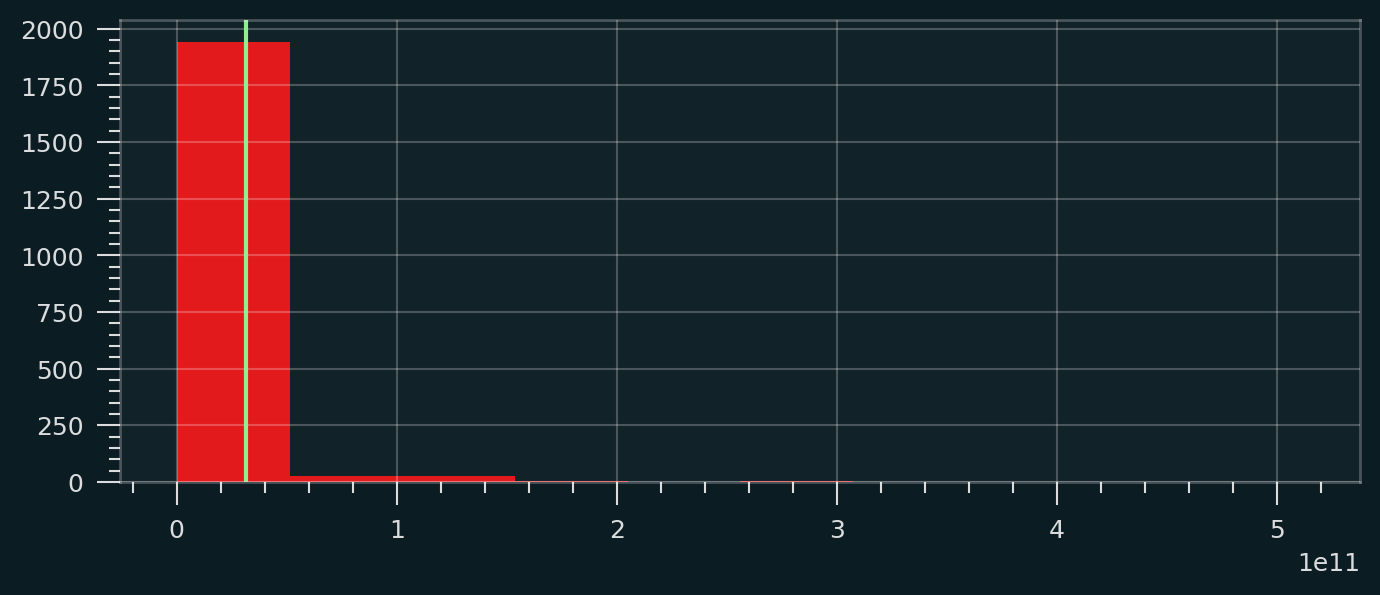

In [313]:
hist, bins = np.histogram(df_tech_assets['total_assets'], bins=10)

print(f'hist counts: {hist}')
print(f'bins: {bins}')

plt.figure(figsize=(8, 3))
plt.hist(df_tech_assets['total_assets'], bins=10)
plt.axvline(df_tech_assets[df_tech_assets['act_symbol']=='XYZ']['total_assets'].values[0], color='lightgreen')
plt.show()

### 2-2. Total Equity

hist counts: [1960   24   10    5    1    1    1    1    0    1]
bins: [-5.768000e+09  2.165650e+10  4.908100e+10  7.650550e+10  1.039300e+11
  1.313545e+11  1.587790e+11  1.862035e+11  2.136280e+11  2.410525e+11
  2.684770e+11]


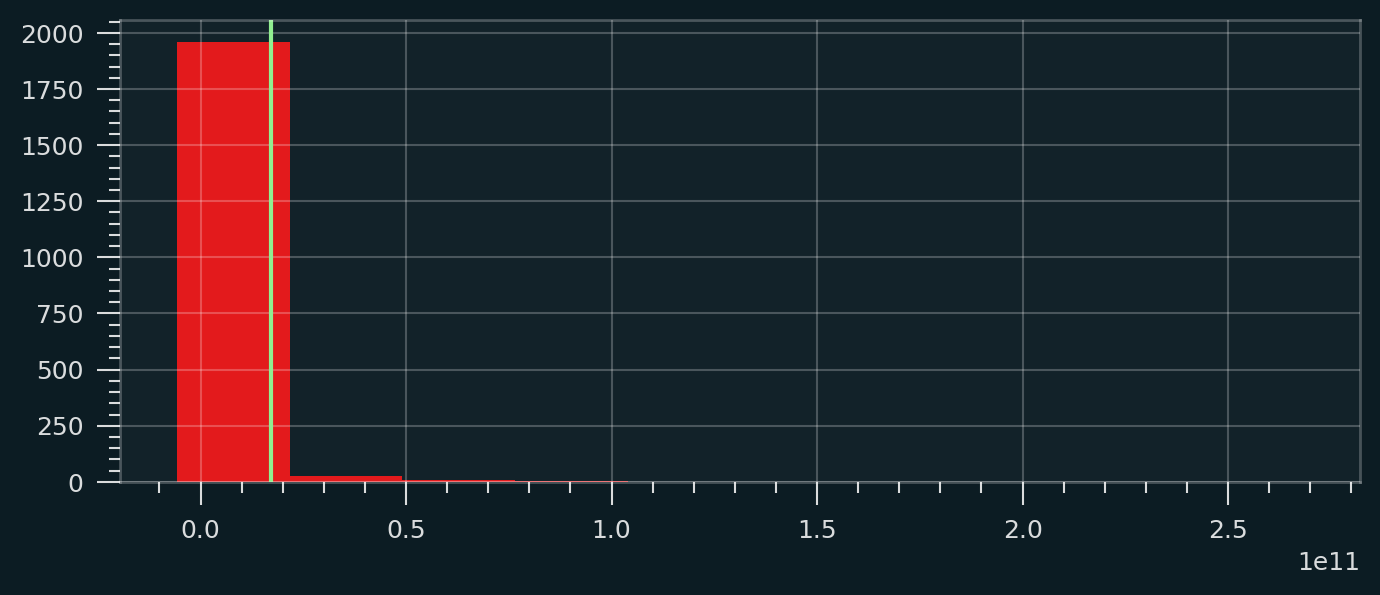

In [314]:
hist, bins = np.histogram(df_tech_equity['total_equity'], bins=10)

print(f'hist counts: {hist}')
print(f'bins: {bins}')

plt.figure(figsize=(8, 3))
plt.hist(df_tech_equity['total_equity'], bins=10)
plt.axvline(df_tech_equity[df_tech_equity['act_symbol']=='XYZ']['total_equity'].values[0], color='lightgreen')
plt.show()

### 2-3. Income Statements

In [21]:
df_tech_incomes.columns

Index(['act_symbol', 'date', 'period', 'sales', 'cost_of_goods',
       'gross_profit',
       'selling_administrative_depreciation_amortization_expenses',
       'income_after_depreciation_and_amortization', 'non_operating_income',
       'interest_expense', 'pretax_income', 'income_taxes',
       'minority_interest', 'investment_gains', 'other_income',
       'income_from_continuing_operations',
       'extras_and_discontinued_operations', 'net_income',
       'income_before_depreciation_and_amortization',
       'depreciation_and_amortization', 'average_shares',
       'diluted_eps_before_non_recurring_items', 'diluted_net_eps'],
      dtype='object')

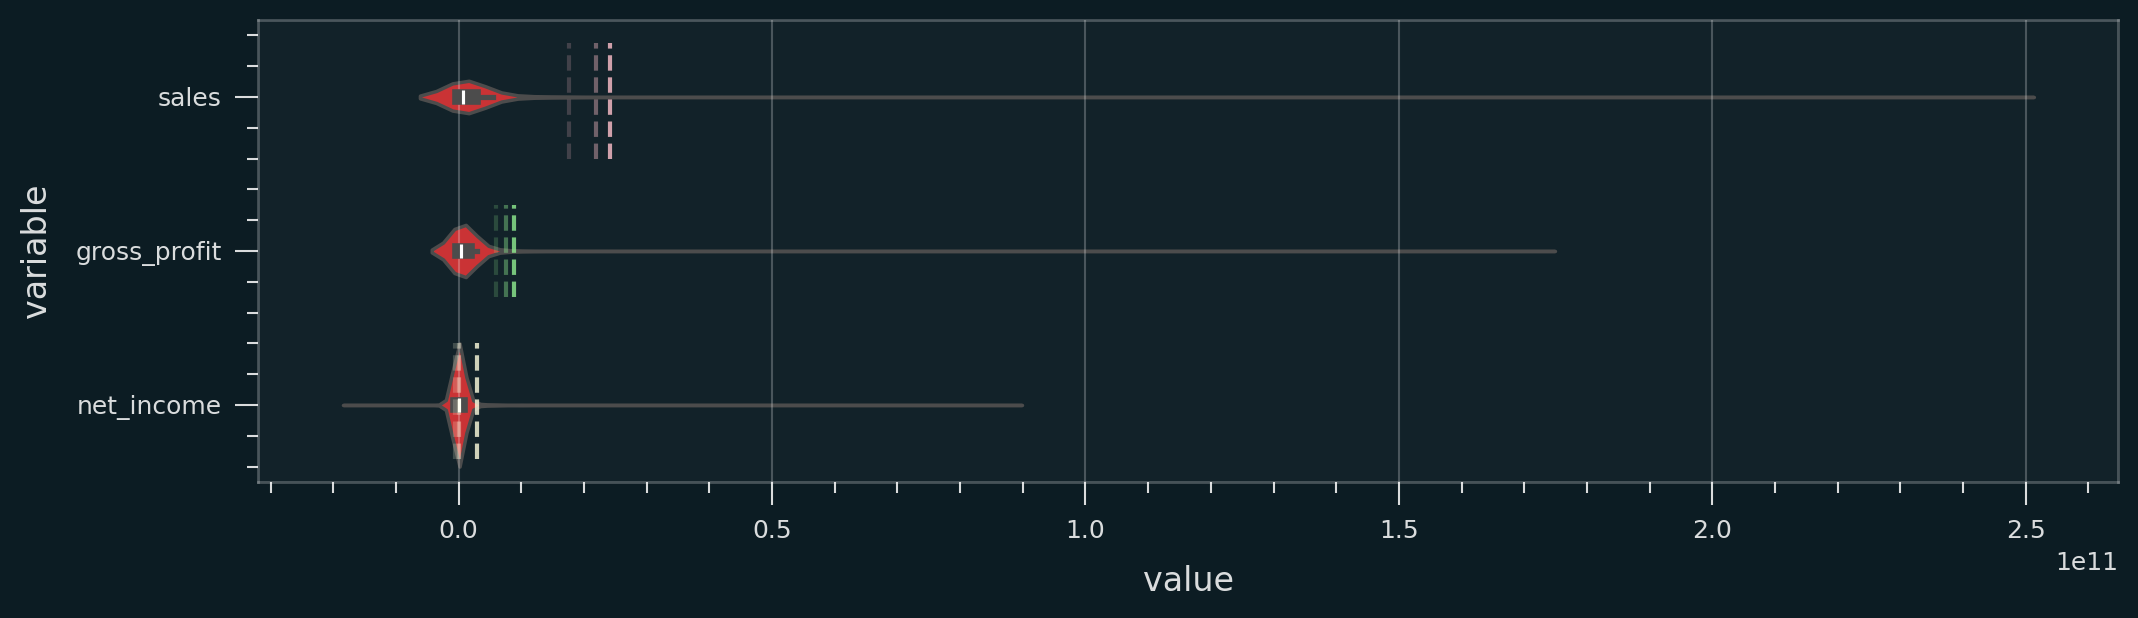

In [63]:
plt.figure(figsize=(12, 3))

# Melt the dataframe to get data in format for vertical violin plot
df_melted = df_tech_incomes[['sales','gross_profit','net_income']].melt()
sns.violinplot(x='value', y='variable', data=df_melted)

xyz_sales = df_tech_incomes[df_tech_incomes['act_symbol'] == 'XYZ']['sales'].values
xyz_gp = df_tech_incomes[df_tech_incomes['act_symbol'] == 'XYZ']['gross_profit'].values  
xyz_ni = df_tech_incomes[df_tech_incomes['act_symbol'] == 'XYZ']['net_income'].values

for i in range(3):
    alpha = 0.2 * (2**i)
    alpha = min(alpha, 1.0) 
    plt.axvline(xyz_sales[i], ymin=0.7, ymax=0.95, color='pink', linestyle='--', alpha=alpha, zorder=3)
    plt.axvline(xyz_gp[i], ymin=0.4, ymax=0.6, color='lightgreen', linestyle='--', alpha=alpha, zorder=3)
    plt.axvline(xyz_ni[i], ymin=0.05, ymax=0.3, color='lightyellow', linestyle='--', alpha=alpha, zorder=3)
plt.show()


## 3. Compare with Similar-Income Group

### 3-1. Get similar group

In [64]:
# Get XYZ's latest financial metrics
xyz_metrics = df_tech_incomes[df_tech_incomes['act_symbol'] == 'XYZ'].iloc[-1]

# Calculate key ratios for comparison
xyz_gp_margin = xyz_metrics['gross_profit'] / xyz_metrics['sales']
xyz_net_margin = xyz_metrics['net_income'] / xyz_metrics['sales']

# Find companies with similar margins (within 20% range)
similar_companies = df_tech_incomes[
    (df_tech_incomes['gross_profit'] / df_tech_incomes['sales'] > xyz_gp_margin * 0.8) &
    (df_tech_incomes['gross_profit'] / df_tech_incomes['sales'] < xyz_gp_margin * 1.2) &
    (df_tech_incomes['net_income'] / df_tech_incomes['sales'] > xyz_net_margin * 0.8) &
    (df_tech_incomes['net_income'] / df_tech_incomes['sales'] < xyz_net_margin * 1.2)
][['act_symbol', 'date', 'sales', 'cost_of_goods', 'gross_profit', 'net_income']]

similar_companies.sort_values('sales', ascending=False)

,act_symbol,date,sales,cost_of_goods,gross_profit,net_income
24,ACN,2024-08-31,6.489600e+10,4.373400e+10,2.116200e+10,7.265000e+09
23,ACN,2023-08-31,6.411200e+10,4.338000e+10,2.073200e+10,6.872000e+09
22,ACN,2022-08-31,6.159400e+10,4.189300e+10,1.970200e+10,6.877000e+09
21,ACN,2021-08-31,5.053300e+10,3.416900e+10,1.636400e+10,5.907000e+09
20,ACN,2020-08-31,4.432700e+10,3.035100e+10,1.397600e+10,5.108000e+09
...,...,...,...,...,...,...
1061,MGIC,2014-12-31,1.640000e+08,1.000000e+08,6.500000e+07,1.700000e+07
1060,MGIC,2013-12-31,1.450000e+08,8.600000e+07,5.900000e+07,1.700000e+07
152,APPS,2020-03-31,1.390000e+08,8.500000e+07,5.400000e+07,1.400000e+07
1059,MGIC,2012-12-31,1.260000e+08,7.300000e+07,5.300000e+07,1.600000e+07


In [65]:
similar_companies['act_symbol'].unique()

array(['ACN', 'ADP', 'APPS', 'BR', 'CTSH', 'DAVA', 'DOX', 'EEFT', 'EPAM',
       'EXLS', 'FIS', 'G', 'GLOB', 'HCKT', 'MGIC', 'SPNS', 'TYL', 'WNS',
       'XYZ'], dtype=object)

In [104]:
len(similar_companies['act_symbol'].unique())

19

### 3-2. Campare market cap

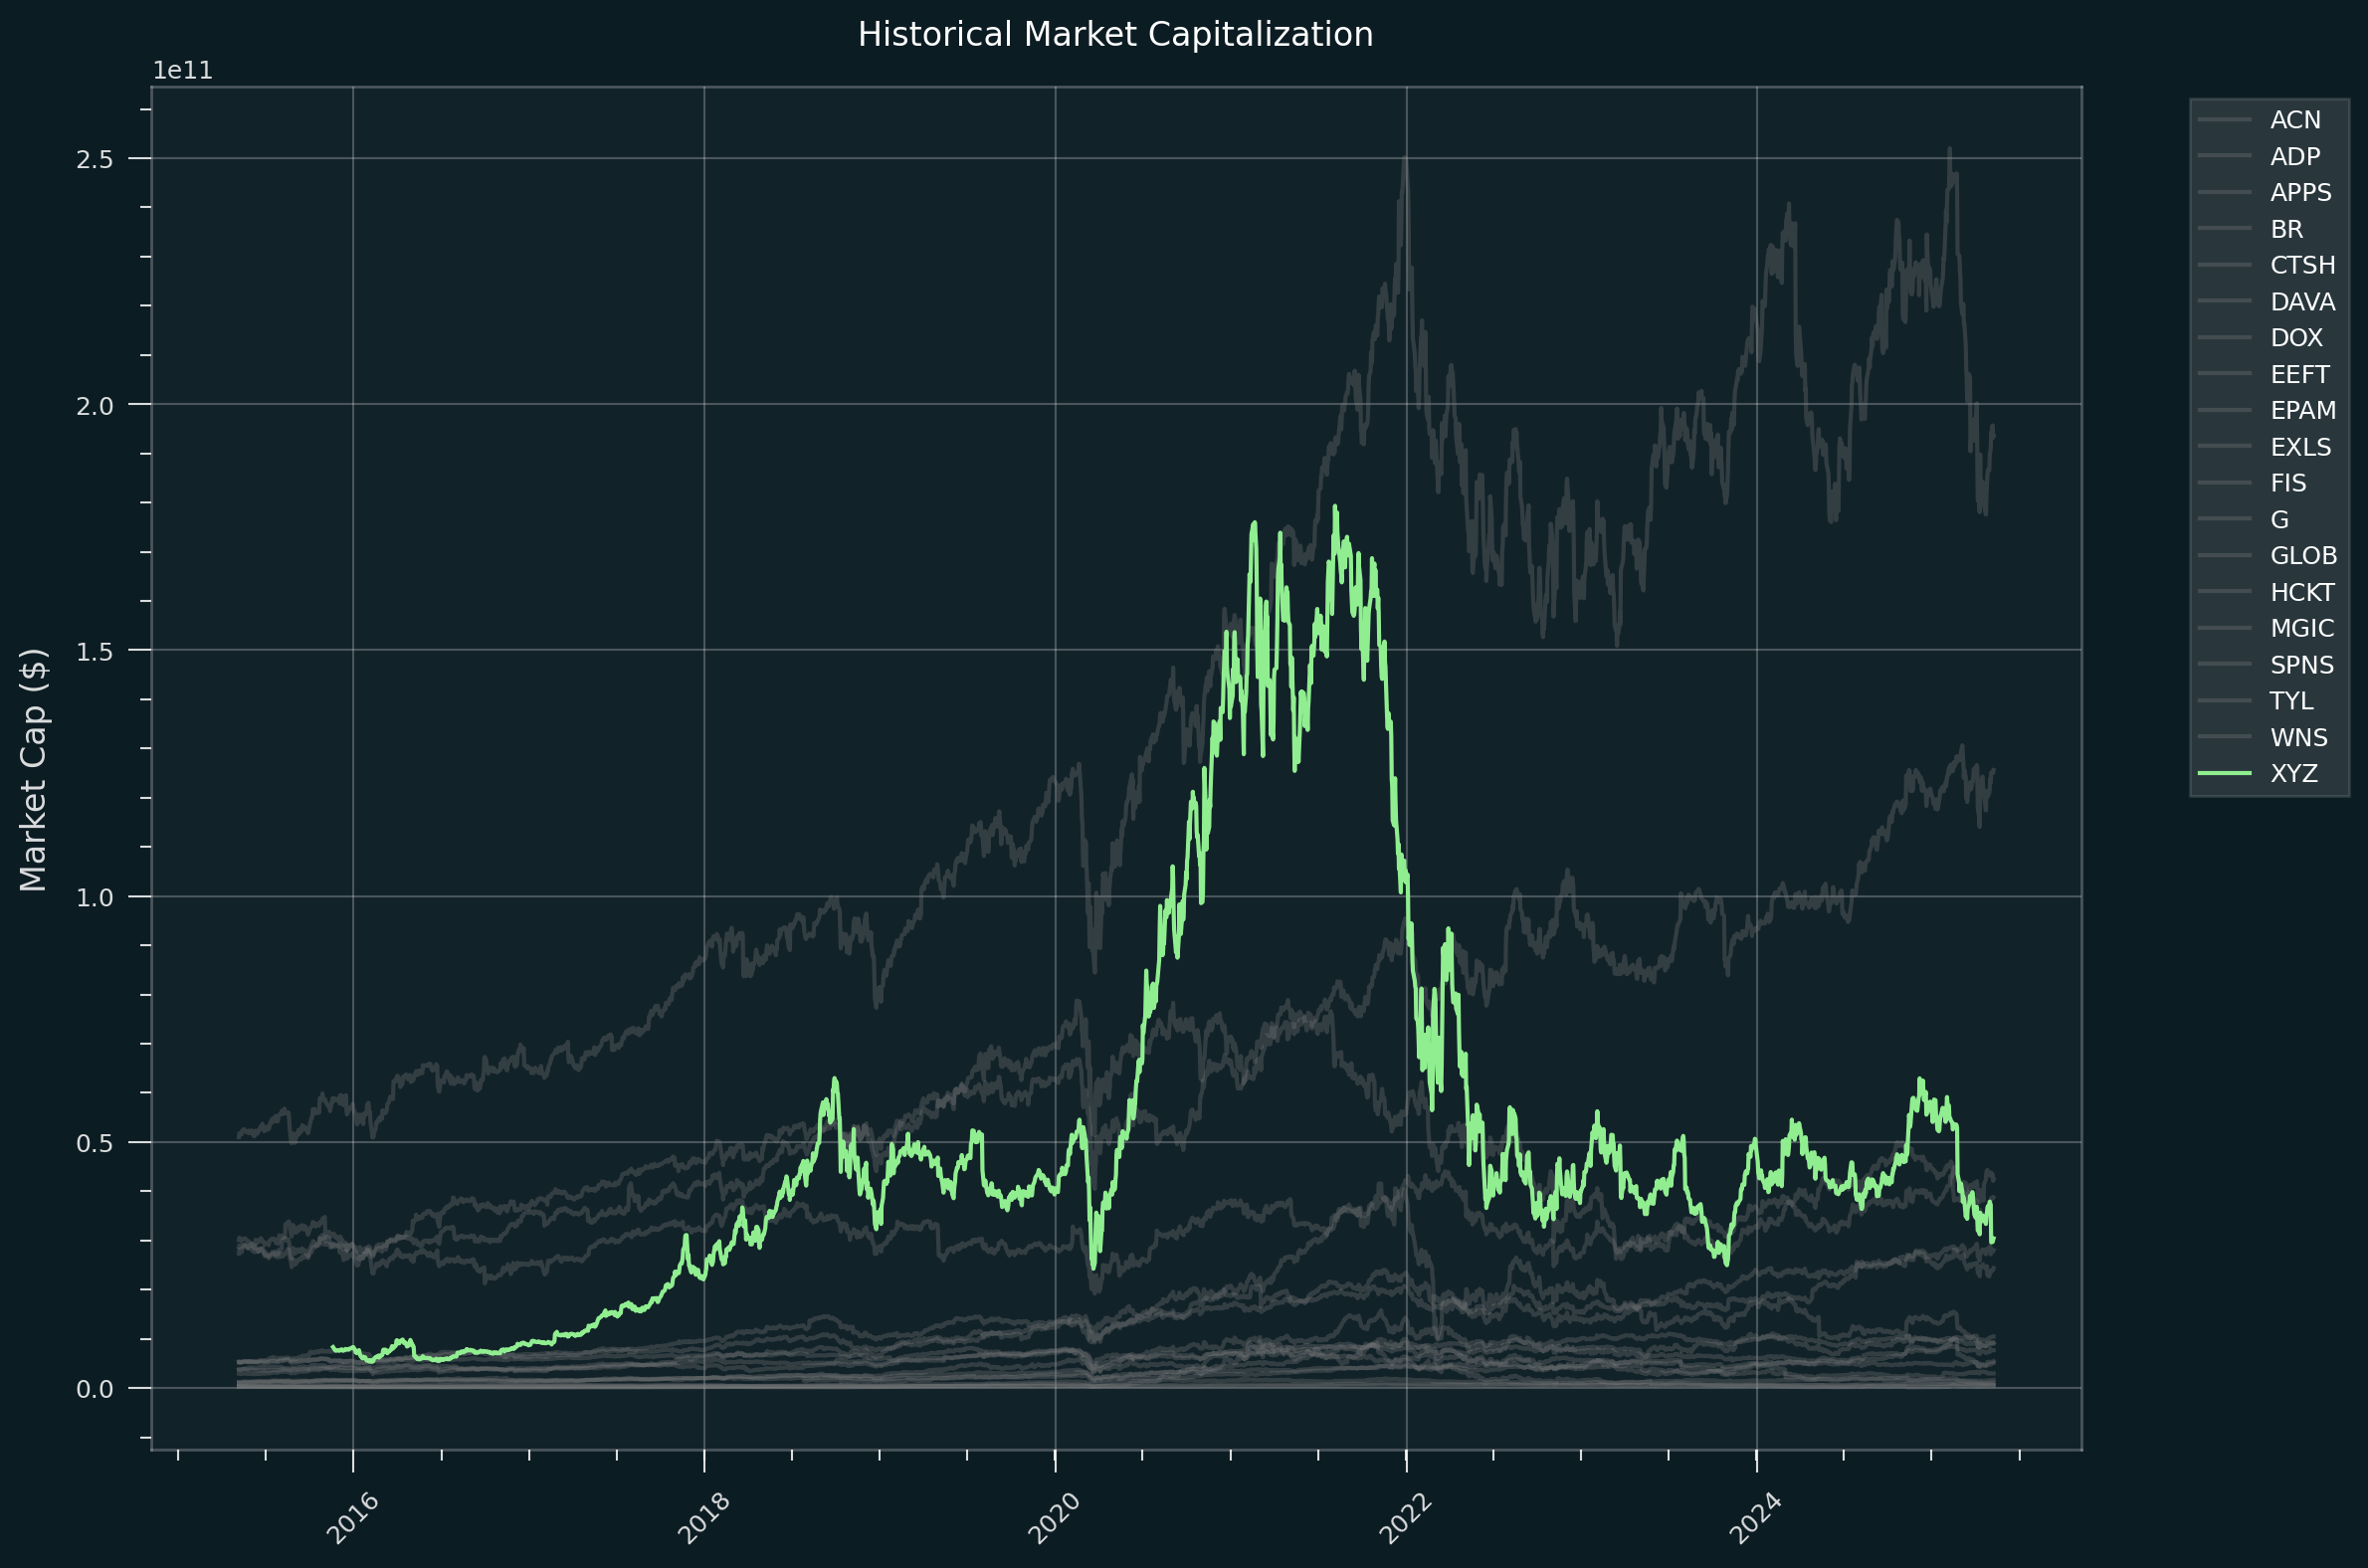

In [71]:
# Calculate historical market caps for similar companies
plt.figure(figsize=(12, 8))

for company in similar_companies['act_symbol'].unique():
    try:
        # Get latest average shares
        latest_shares = df_tech_incomes[df_tech_incomes['act_symbol'] == company].iloc[-1]['average_shares']
        
        # Get historical prices
        stock = yf.Ticker(company)
        hist_prices = stock.history(period='10y')['Close']
        
        # Calculate historical market caps
        market_caps = hist_prices * latest_shares
        
        # Plot with different alpha for XYZ vs others
        alpha = 1.0 if company == 'XYZ' else 0.3
        color = 'lightgreen' if company == 'XYZ' else 'gray'
        plt.plot(market_caps.index, market_caps.values, 
                label=company, alpha=alpha, color=color)

    except:
        # Skip if unable to get price data
        continue

plt.title('Historical Market Capitalization')
plt.ylabel('Market Cap ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### 3-3. Compare EV/Ebitda

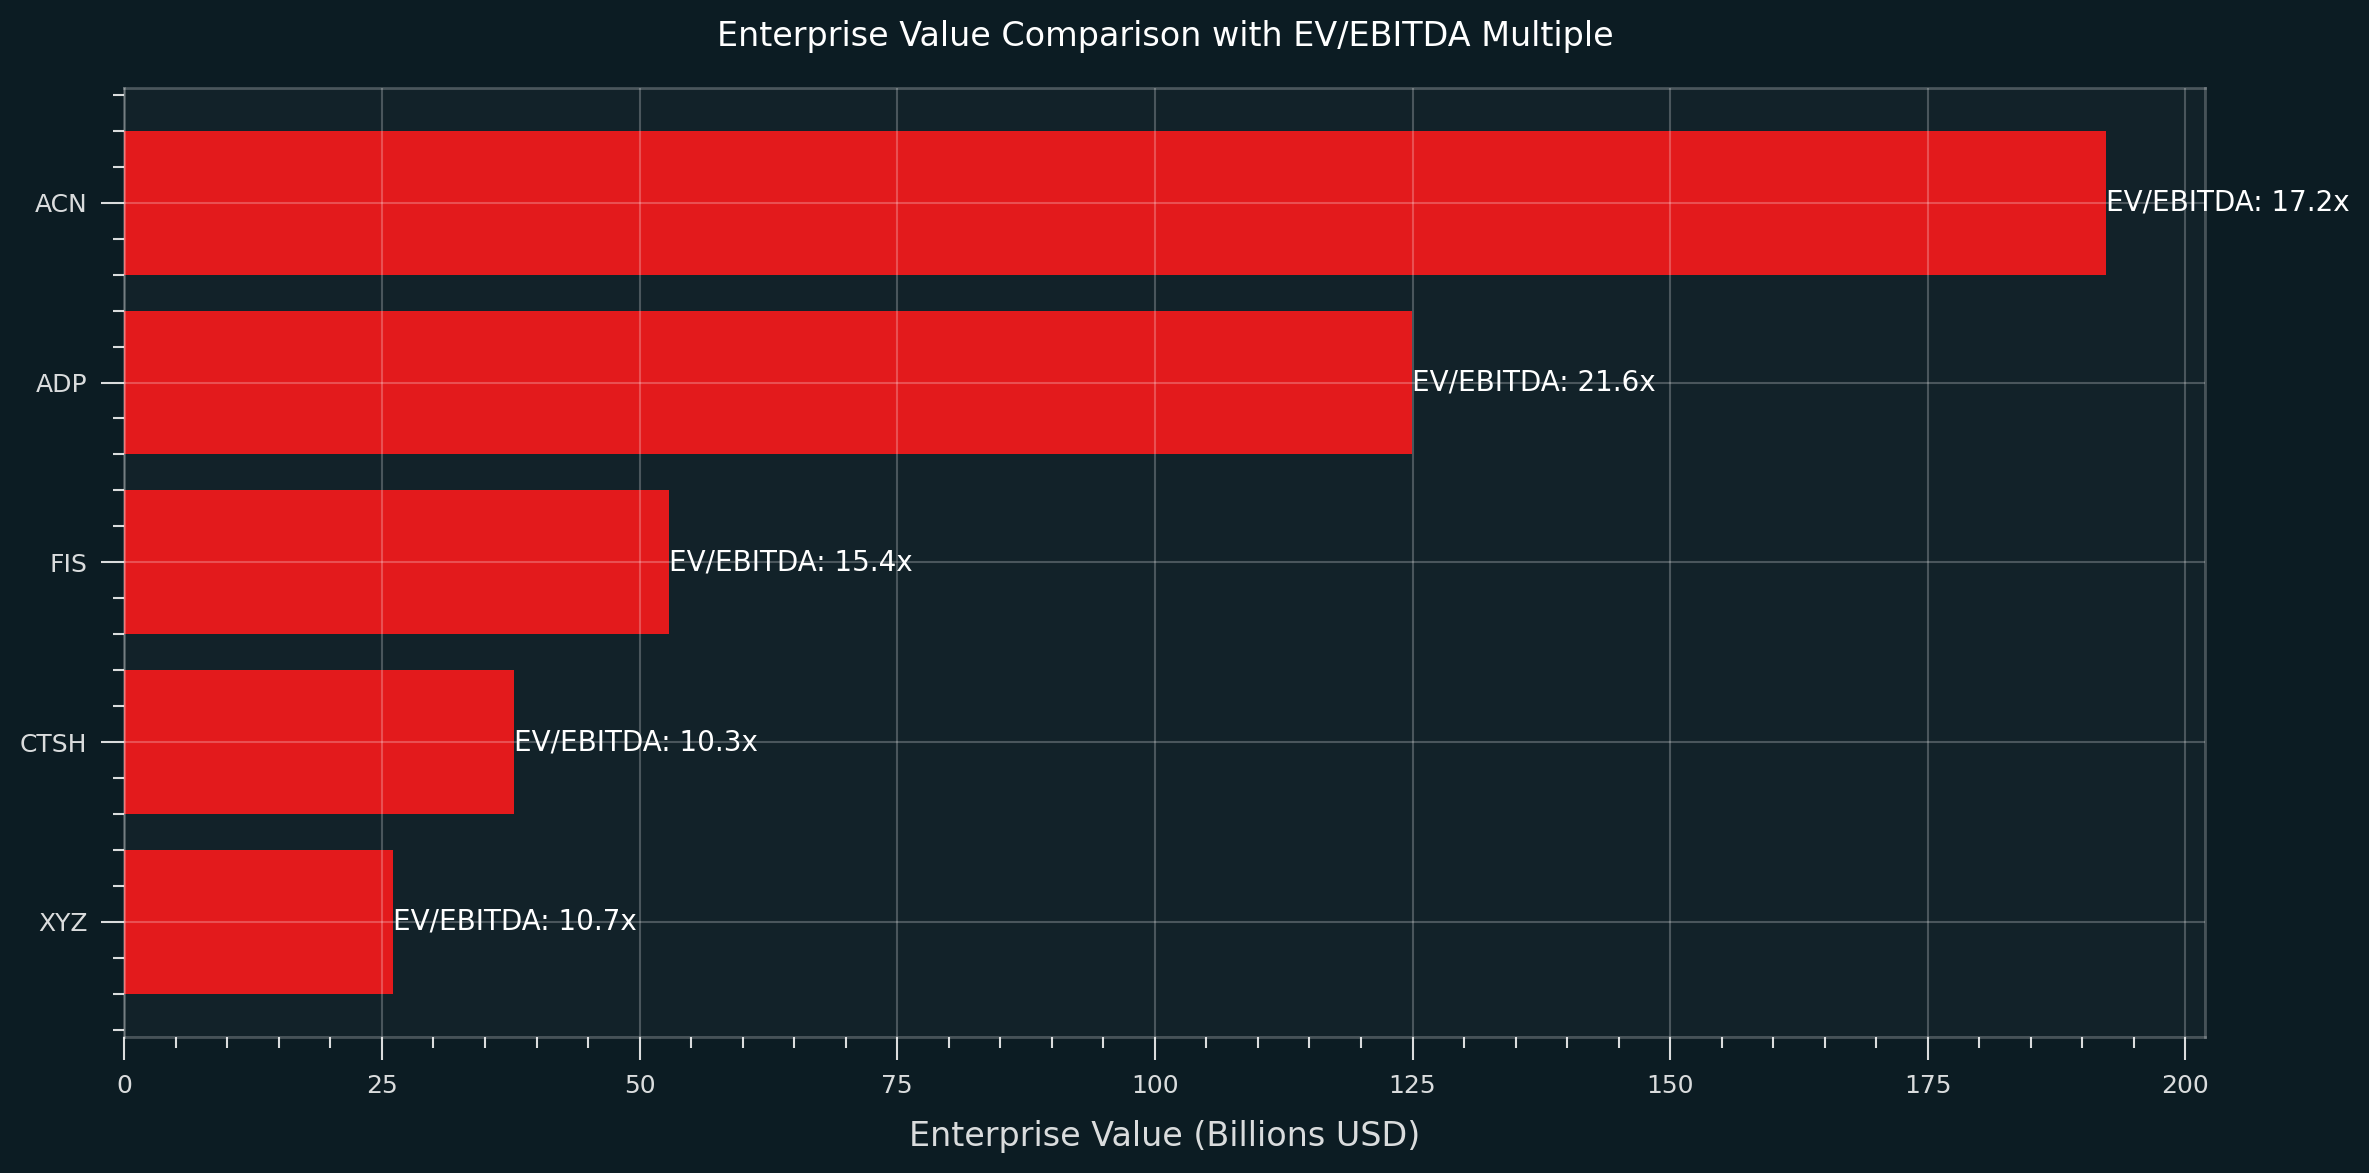

In [102]:
# Calculate market caps using latest average shares * current price
xyz_shares = df_incomes[df_incomes['act_symbol']=='XYZ'].iloc[-1]['average_shares']
xyz_price = yf.Ticker('XYZ').history(period='1d')['Close'][0]
xyz_mcap = xyz_shares * xyz_price

larger_companies = []
for company in similar_companies['act_symbol'].unique():
    try:
        shares = df_incomes[df_incomes['act_symbol']==company].iloc[-1]['average_shares']
        price = yf.Ticker(company).history(period='1d')['Close'][0]
        mcap = shares * price
        if mcap > xyz_mcap:
            larger_companies.append(company)
    except:
        continue

# Get EBITDA and market cap data
data = []
xyz_ebitda = yf.Ticker('XYZ').income_stmt.loc['Normalized EBITDA']
data.append({
    'Company': 'XYZ',
    'Market Cap': xyz_mcap,
    'EBITDA': xyz_ebitda.iloc[0] if not xyz_ebitda.empty else None
})

for company in larger_companies:
    try:
        shares = df_incomes[df_incomes['act_symbol']==company].iloc[-1]['average_shares']
        price = yf.Ticker(company).history(period='1d')['Close'][0]
        mcap = shares * price
        ebitda = yf.Ticker(company).income_stmt.loc['Normalized EBITDA']
        data.append({
            'Company': company,
            'Market Cap': mcap,
            'EBITDA': ebitda.iloc[0] if not ebitda.empty else None
        })
    except:
        continue

# Create DataFrame and plot
df = pd.DataFrame(data)
df = df.sort_values('Market Cap', ascending=True)

# Calculate EV and EV/EBITDA ratio for each company
for i, row in df.iterrows():
    try:
        ticker = yf.Ticker(row['Company'])
        balance_sheet = ticker.balance_sheet
        total_debt = balance_sheet.loc['Total Debt'].iloc[0] if 'Total Debt' in balance_sheet.index else 0
        cash = balance_sheet.loc['Cash And Cash Equivalents'].iloc[0] if 'Cash And Cash Equivalents' in balance_sheet.index else 0
        
        ev = row['Market Cap'] + total_debt - cash
        df.loc[i, 'Enterprise Value'] = ev
        df.loc[i, 'EV/EBITDA'] = ev / row['EBITDA'] if pd.notnull(row['EBITDA']) else None
    except:
        df.loc[i, 'Enterprise Value'] = None
        df.loc[i, 'EV/EBITDA'] = None

plt.figure(figsize=(12,6))
bars = plt.barh(df['Company'], df['Enterprise Value']/1e9)

# Add EV/EBITDA ratio as text
for i, bar in enumerate(bars):
    if pd.notnull(df.iloc[i]['EV/EBITDA']):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                f"EV/EBITDA: {df.iloc[i]['EV/EBITDA']:.1f}x",
                va='center')

plt.title('Enterprise Value Comparison with EV/EBITDA Multiple')
plt.xlabel('Enterprise Value (Billions USD)')
plt.tight_layout()
plt.show()


EV/EBITDA Multiple Comparison:
--------------------------------
Peer Group Statistics:
Mean: 15.5x
Median: 13.8x
Min: 1.8x
Max: 51.7x

XYZ's Multiple: 10.7x
XYZ's Percentile Rank: 26.3%


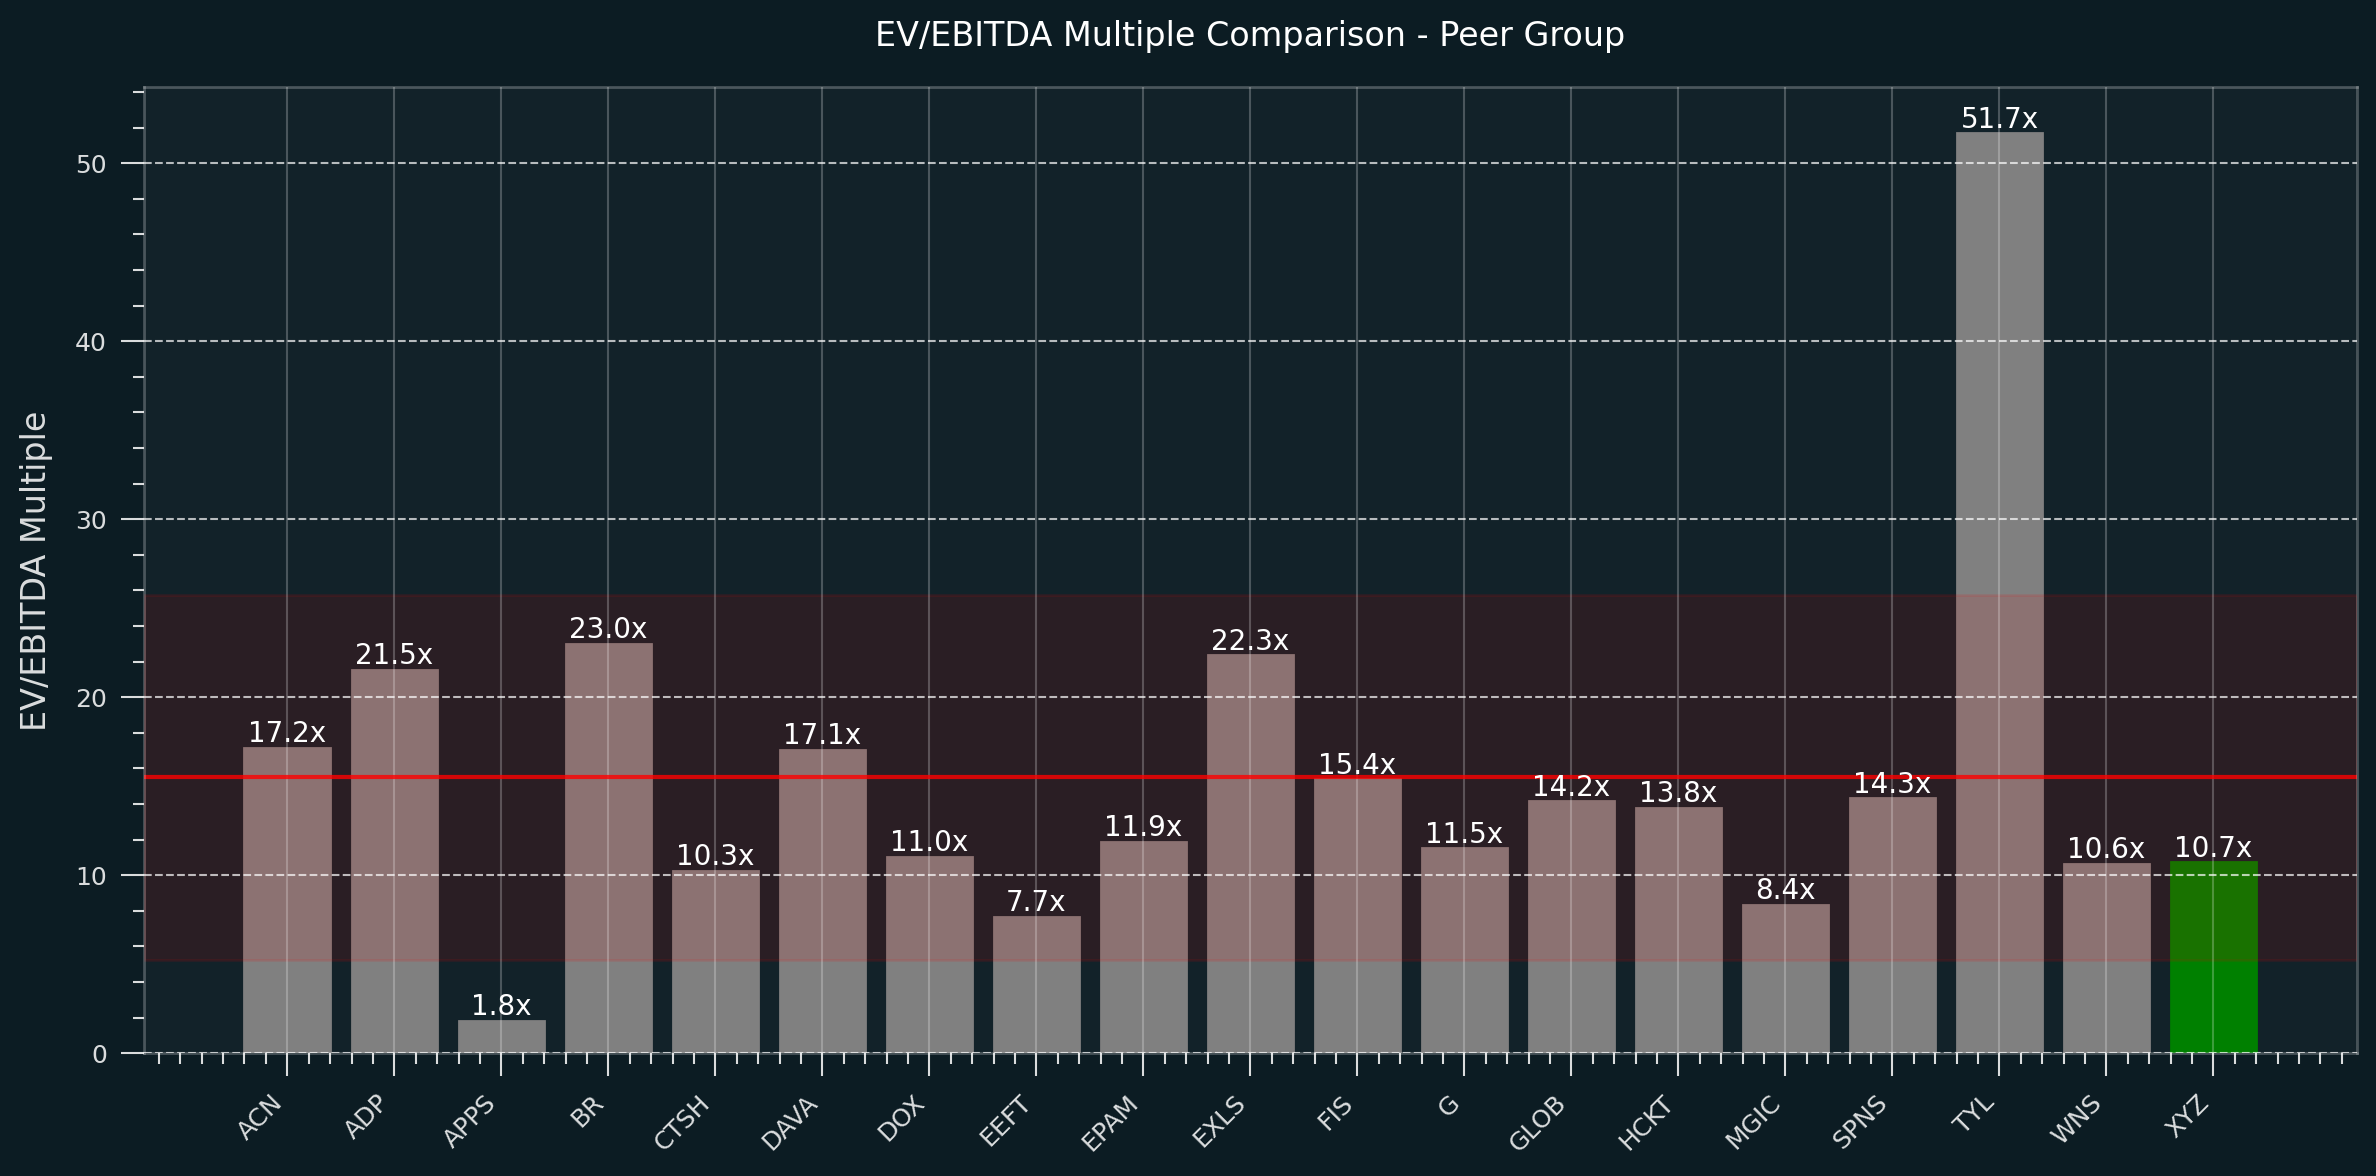

In [107]:
# Calculate EV/EBITDA for each company
data = []
for company in similar_companies['act_symbol'].unique():
    try:
        # Get latest shares and price for market cap
        shares = df_incomes[df_incomes['act_symbol']==company].iloc[-1]['average_shares']
        price = yf.Ticker(company).history(period='1d')['Close'][0]
        mcap = shares * price
        
        # Get financial data
        ticker = yf.Ticker(company)
        
        # Get EBITDA
        ebitda = ticker.income_stmt.loc['Normalized EBITDA'].iloc[0] if 'Normalized EBITDA' in ticker.income_stmt.index else None
        
        # Get debt and cash for EV calculation
        balance_sheet = ticker.balance_sheet
        total_debt = balance_sheet.loc['Total Debt'].iloc[0] if 'Total Debt' in balance_sheet.index else 0
        cash = balance_sheet.loc['Cash And Cash Equivalents'].iloc[0] if 'Cash And Cash Equivalents' in balance_sheet.index else 0
        
        # Calculate EV and EV/EBITDA
        ev = mcap + total_debt - cash
        ev_ebitda = ev/ebitda if ebitda and ebitda > 0 else None
        
        data.append({
            'Company': company,
            'Market Cap': mcap,
            'Enterprise Value': ev,
            'EBITDA': ebitda,
            'EV/EBITDA': ev_ebitda
        })
    except:
        continue

# Create DataFrame and remove any rows with null EV/EBITDA
peer_group_df = pd.DataFrame(data)
peer_group_df = peer_group_df.dropna(subset=['EV/EBITDA'])

# Calculate summary statistics
ev_ebitda_stats = peer_group_df['EV/EBITDA'].describe()

print("\nEV/EBITDA Multiple Comparison:")
print("--------------------------------")
print(f"Peer Group Statistics:")
print(f"Mean: {ev_ebitda_stats['mean']:.1f}x")
print(f"Median: {ev_ebitda_stats['50%']:.1f}x") 
print(f"Min: {ev_ebitda_stats['min']:.1f}x")
print(f"Max: {ev_ebitda_stats['max']:.1f}x")

# Get XYZ's multiple
xyz_multiple = peer_group_df[peer_group_df['Company'] == 'XYZ']['EV/EBITDA'].iloc[0]
print(f"\nXYZ's Multiple: {xyz_multiple:.1f}x")

# Calculate percentile rank of XYZ
percentile = (peer_group_df['EV/EBITDA'] < xyz_multiple).mean() * 100
print(f"XYZ's Percentile Rank: {percentile:.1f}%")

# Create bar plot comparing EV/EBITDA multiples
plt.figure(figsize=(12,6))
bars = plt.bar(peer_group_df['Company'], peer_group_df['EV/EBITDA'])

# Color XYZ's bar differently
for i, bar in enumerate(bars):
    if peer_group_df.iloc[i]['Company'] == 'XYZ':
        bar.set_color('green')
    else:
        bar.set_color('gray')
    
    # Add value labels on top of bars
    height = bar.get_height()
    if pd.notnull(height):
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}x',
                ha='center', va='bottom')

# Add span for mean +/- 1.5 std
plt.axhspan(ev_ebitda_stats['mean'] - 1*ev_ebitda_stats['std'], 
            ev_ebitda_stats['mean'] + 1*ev_ebitda_stats['std'],
            alpha=0.1, color='red')

# Add line for mean
plt.axhline(y=ev_ebitda_stats['mean'], color='red', alpha=0.8)

plt.title('EV/EBITDA Multiple Comparison - Peer Group')
plt.ylabel('EV/EBITDA Multiple')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [73]:
df_incomes[df_incomes['act_symbol']=='XYZ']

,act_symbol,date,period,sales,cost_of_goods,gross_profit,selling_administrative_depreciation_amortization_expenses,income_after_depreciation_and_amortization,non_operating_income,interest_expense,...,investment_gains,other_income,income_from_continuing_operations,extras_and_discontinued_operations,net_income,income_before_depreciation_and_amortization,depreciation_and_amortization,average_shares,diluted_eps_before_non_recurring_items,diluted_net_eps
219975,XYZ,2022-12-31,Year,1.753200e+10,1.154000e+10,5.992000e+09,6.616000e+09,-625000000.0,95000000.0,36000000.0,...,0.0,0.0,-5.530000e+08,0.0,-5.410000e+08,-877000000.0,-252000000.0,615030000.0,-0.75,-0.93
219976,XYZ,2023-12-31,Quarter,5.773040e+09,3.747290e+09,2.025750e+09,2.156410e+09,-130660000.0,217960000.0,-18700000.0,...,0.0,0.0,1.578000e+08,0.0,1.780700e+08,NaN,NaN,629130000.0,0.03,0.30
219977,XYZ,2023-12-31,Year,2.191600e+10,1.441100e+10,7.505000e+09,7.784000e+09,-279000000.0,202000000.0,-47000000.0,...,0.0,0.0,-2.100000e+07,0.0,1.000000e+07,-722000000.0,-444000000.0,614020000.0,0.16,0.02
219978,XYZ,2024-03-31,Quarter,5.957130e+09,3.862660e+09,2.094470e+09,1.844720e+09,249750000.0,237820000.0,-18750000.0,...,0.0,0.0,4.708200e+08,0.0,4.720100e+08,NaN,NaN,637360000.0,0.47,0.74
219979,XYZ,2024-06-30,Quarter,6.155560e+09,3.922080e+09,2.233480e+09,1.926910e+09,306570000.0,-59530000.0,-1870000.0,...,0.0,0.0,1.898700e+08,0.0,1.952700e+08,NaN,NaN,634220000.0,0.52,0.31
219980,XYZ,2024-09-30,Quarter,5.975800e+09,3.726120e+09,2.249690e+09,1.926670e+09,323020000.0,14950000.0,13810000.0,...,0.0,0.0,2.811400e+08,0.0,2.837500e+08,NaN,NaN,632760000.0,0.57,0.45
219981,XYZ,2024-12-31,Quarter,6.032560e+09,3.721160e+09,2.311400e+09,2.298390e+09,13010000.0,280890000.0,16110000.0,...,0.0,0.0,1.924670e+09,0.0,1.946020e+09,NaN,NaN,639300000.0,0.26,3.06
219982,XYZ,2024-12-31,Year,2.412100e+10,1.523200e+10,8.889000e+09,7.997000e+09,892000000.0,474000000.0,9000000.0,...,0.0,0.0,2.867000e+09,0.0,2.897000e+09,303000000.0,-589000000.0,636390000.0,3.37,4.56


# Market Cap Analysis

Looking at the market cap comparison plot above, we can observe that XYZ (shown in green) has a higher market capitalization compared to many similar companies (shown in gray) despite having comparable financial metrics. This valuation premium could be due to several factors:

1. Growth Prospects
- XYZ shows strong revenue growth trajectory (from $17.5B in 2022 to projected $24.1B in 2024)
- Net income improved significantly from -$541M in 2022 to projected $2.9B in 2024
- This rapid growth may justify higher valuation multiples

2. Profitability Improvements  
- Gross margins expanded from 34% in 2022 to projected 37% in 2024
- Turned from net loss to strong profitability
- Market likely rewards improving operational efficiency

3. Balance Sheet Strength
- Strong cash position ($8.5B in 2024)
- Relatively low debt levels
- Healthy working capital ratios

4. Market Perception & Positioning
- May be viewed as technology leader in its space
- Could have stronger brand recognition
- Possibly better positioned in high-growth market segments

5. Liquidity & Trading Factors
- Higher trading volume/float may attract more institutional investors
- Potentially included in major indices
- Better analyst coverage and market visibility

The smaller market caps of peers despite similar financials could indicate they:
- Have slower growth rates
- Operate in less attractive market segments
- Have weaker competitive positions
- Receive less market attention/coverage
- Trade at lower multiples due to perceived risks

This suggests XYZ commands a premium valuation due to both fundamental factors (growth, profitability improvements) and market perception factors (positioning, visibility).


In [ ]:
hist, bins = np.histogram(df_tech_assets['total_assets'], bins=10)

print(f'hist counts: {hist}')
print(f'bins: {bins}')

plt.figure(figsize=(8, 3))
plt.hist(df_tech_assets['total_assets'], bins=10)
plt.axvline(df_tech_assets[df_tech_assets['act_symbol']=='XYZ']['total_assets'].values[0], color='lightgreen')
plt.show()




In [281]:
df_tech_assets[df_tech_assets['act_symbol'] == 'XYZ']

,date,act_symbol,period,cash_and_equivalents,receivables,notes_receivable,inventories,other_current_assets,total_current_assets,net_property_and_equipment,investments_and_advances,other_non_current_assets,deferred_charges,intangibles,deposits_and_other_assets,total_assets
1963,2022-12-31,XYZ,Year,5.626000e+09,4.287000e+09,0.0,0.0,5.710000e+09,1.562300e+10,329000000.0,0.0,573000000.0,0.000000e+00,1.398100e+10,4.840000e+08,3.136400e+10
1964,2023-12-31,XYZ,Year,5.848000e+09,5.671000e+09,0.0,0.0,7.338000e+09,1.885700e+10,296000000.0,0.0,251000000.0,0.000000e+00,1.368100e+10,7.390000e+08,3.407000e+10
1965,2024-12-31,XYZ,Year,8.479000e+09,3.566000e+09,0.0,0.0,7.836000e+09,1.988000e+10,314000000.0,0.0,472000000.0,1.801000e+09,1.285000e+10,1.240000e+09,3.677800e+10


In [280]:
df_tech_incomes[df_tech_incomes['act_symbol'] == 'XYZ']

,act_symbol,date,period,sales,cost_of_goods,gross_profit,selling_administrative_depreciation_amortization_expenses,income_after_depreciation_and_amortization,non_operating_income,interest_expense,...,investment_gains,other_income,income_from_continuing_operations,extras_and_discontinued_operations,net_income,income_before_depreciation_and_amortization,depreciation_and_amortization,average_shares,diluted_eps_before_non_recurring_items,diluted_net_eps
1958,XYZ,2022-12-31,Year,1.753200e+10,1.154000e+10,5.992000e+09,6.616000e+09,-625000000.0,95000000.0,36000000.0,...,0.0,0.0,-5.530000e+08,0.0,-5.410000e+08,-877000000.0,-252000000.0,615030000.0,-0.75,-0.93
1959,XYZ,2023-12-31,Year,2.191600e+10,1.441100e+10,7.505000e+09,7.784000e+09,-279000000.0,202000000.0,-47000000.0,...,0.0,0.0,-2.100000e+07,0.0,1.000000e+07,-722000000.0,-444000000.0,614020000.0,0.16,0.02
1960,XYZ,2024-12-31,Year,2.412100e+10,1.523200e+10,8.889000e+09,7.997000e+09,892000000.0,474000000.0,9000000.0,...,0.0,0.0,2.867000e+09,0.0,2.897000e+09,303000000.0,-589000000.0,636390000.0,3.37,4.56


In [282]:
yf.Ticker('XYZ').balance_sheet

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Ordinary Shares Number,619676000.0,615821000.0,600059542.0,464943787.0,NaN
Share Issued,619676000.0,615821000.0,600059542.0,464943787.0,NaN
Net Debt,NaN,NaN,504063000.0,613527000.0,NaN
Total Debt,7918613000.0,6071517000.0,6332764000.0,5516240000.0,NaN
Tangible Book Value,8417443000.0,5014015000.0,3242084000.0,2496530000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,12749513000.0,9416426000.0,8806377000.0,8143947000.0,NaN
Other Short Term Investments,491394000.0,1249531000.0,1081851000.0,3700278000.0,NaN
Cash And Cash Equivalents,12258119000.0,8166895000.0,7724526000.0,4443669000.0,NaN
Cash Equivalents,987619000.0,1032796000.0,1431341000.0,NaN,NaN


In [133]:
dum = df_incomes[df_incomes['act_symbol'] == 'AAPL'][['act_symbol','date', 'period', 'average_shares']]
dum.set_index('date', inplace=True)
dum.index = dum.index.astype('datetime64[ns]')
dum = dum[dum['period'] == 'Quarter']
dum.bfill(inplace=True)
dum

,act_symbol,period,average_shares
date,,,
2016-09-30,AAPL,Quarter,5.393330e+09
2016-12-31,AAPL,Quarter,5.328000e+09
2017-03-31,AAPL,Quarter,5.261690e+09
2017-06-30,AAPL,Quarter,5.233500e+09
2017-09-30,AAPL,Quarter,5.183590e+09
2017-12-31,AAPL,Quarter,5.157790e+09
2018-03-31,AAPL,Quarter,5.068490e+09
2018-06-30,AAPL,Quarter,4.926610e+09
2018-09-30,AAPL,Quarter,4.847550e+09
